## Functional Specification

|Function|Comment|Marz|dc_spectra|
|--------------------|--------------------|-----|-----|
|Set Spectra<br><i>ssv.setSpectra(data)</i>|FITS format|Yes|Yes|
|Get Spectra<br><i>ssv.getSpectra()</i>||Yes|No|
|Set Vertical Lines|Standard emission/absortion lines|Yes|Yes|
|Set Labeled Vertical Lines|Standard emission/absortion lines|Yes|No|
|Set X axis|Ticks, labels, title|Yes|Yes|
|Set Y axis|Ticks, labels, title|Yes|Yes|
|Show chart grid||Yes|Yes|
|Show chart legend||No|Yes|
|Allow chart download||Yes|Yes|
|Processed - Data|Toggle between Processed and Raw|Yes|No|
|Data - Raw|Toggle between Processed and Raw|Yes|No|
|On - Template|Show template trace|Yes|No|
|Off - Template|Hide template trace|Yes|No|
|On - Continuum|Show spectrum with Continuum transform|Yes|No|
|Off - Continuum|Show spectrum without Continuum transform|Yes|No|
|On - Variance|Show "Variance" trace|Yes|No|
|Off - Variance|Hide "Variance" trace|Yes|No|
|On - Sky|Show "Sky" trace|Yes|No|
|Off - Sky|Hide "Sky" trace|Yes|No|
|Reset auto|??|Yes|No|
|Reset manual|??|Yes|No|
|Smooth|Show spectrum with width N smoothing transform|Yes|No|
|Range R|Adjust Y axis limits to R% of full scale|Yes|No|
|Top Results N|Show spectrum with redshift(N)|Yes|No|
|Template|Show selected "Template" trace|Yes|No|
|Offset|Display "Template" trace with Y offset|Yes|No|
|Redshift|Display spectrum trace with X offset|Yes|No|
|Perform Fit|Display spectrum trace with X offset|Yes|No|
|Drop Pin|Display pin at position X,Y|Yes|No|

## dc_spectra example

In [1]:
# Install deps for this notebook
# !pip install -e ../../.
# !pip install vega
# !jupyter nbextension install --py --sys-prefix vega
# !jupyter nbextension enable vega --py --sys-prefix

In [2]:
# for plotting spectra
import ssv
from astropy.table import QTable
import astropy.units as u
import numpy as np
import pandas as pd
import altair as alt
alt.renderers.enable('notebook')

RendererRegistry.enable('notebook')

In [3]:
# for rendering plots
from vega import VegaLite
from json import loads
from pathlib import Path

## SSV Example

In [5]:
from ssv.viewer import read_spectra_file_simple, read_template_file, \
                            SimpleSpectrum, SimpleSpectralLines, SimpleSpectrumViewer
from ssv import utils
from ssv import loaders
datadir = Path('../../tests/data/')
GAMA_GAMA_TEST_FILENAME = "G12_Y2_009_044.fit"

templatedir = Path('../MarzV2/examples/')
TEMPLATE_FILENAME = 'MarzTemplates.json'

formats = loaders.whatformat(datadir / GAMA_GAMA_TEST_FILENAME)
if len(formats) > 1:
    loaders.unregister(formats[0])
spectrum_data = read_spectra_file_simple(datadir / GAMA_GAMA_TEST_FILENAME)
loaders.restore_registered_loaders()
template_data = read_template_file(templatedir / TEMPLATE_FILENAME)

In [6]:
show_variance = True
show_sky = True
template_choice = 'G Star'
show_templates = True

In [7]:
# from ssv.plugin_collection import PluginCollection

# def fit_template_and_redshift(spectrum_file):
#     my_plugins = PluginCollection('plugins')
#     return my_plugins.apply_reduce_on_plugin("MarzCLI", spectrum_file)


# MARZ_MARZ_TEST_FILENAME = "quasarLinearSkyAirNoHelio.fits"

# spectrum_filename = MARZ_MARZ_TEST_FILENAME
# spectrum_file = datadir / spectrum_filename

# best_fit_redshift, best_fit_template = fit_template_and_redshift(str(spectrum_file))

/Applications/anaconda3/envs/SSV/lib/python3.7/site-packages/astropy/units/quantity.py:477: RuntimeWarning: invalid value encountered in greater
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)
/Applications/anaconda3/envs/SSV/lib/python3.7/site-packages/scipy/interpolate/interpolate.py:2533: RuntimeWarning: invalid value encountered in true_divide
  (grid[i + 1] - grid[i]))


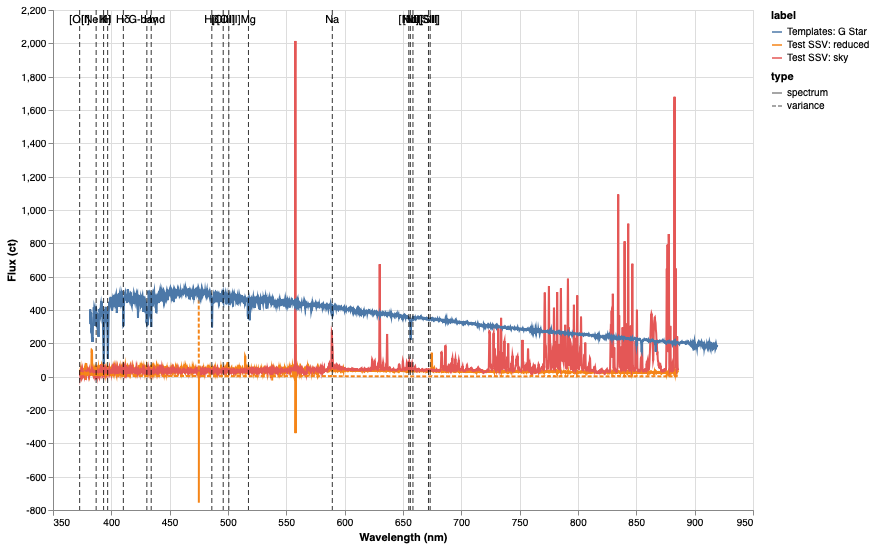

In [8]:
spectrum = SimpleSpectrum('Test SSV', spectrum_data)
spectrum.set_visible_traces('reduced')
flux_range = spectrum.flux_range('reduced')
spectrum.set_variance_visible('reduced', show_variance)
spectrum.set_trace_visible('sky', show_sky)
spectrum.set_transform_functions(['reduced', 'sky'], [utils.remove_spurious_points])

lines = SimpleSpectralLines()
# lines.redshift_wavelength(best_fit_redshift)

templates = SimpleSpectrum('Templates', template_data)
templates.set_visible_traces(template_choice)
templates.set_trace_visible(template_choice, show_templates)
# templates.redshift_wavelength(best_fit_redshift, best_fit_template)
templates.set_transform_functions(template_choice, [utils.remove_spurious_points])

viewer = SimpleSpectrumViewer('Simple')
viewer.add_spectrum(spectrum)
viewer.add_spectrum(templates)
viewer.add_lines(lines)
viewer.show_grid(True)
viewer.show_legend(True)
viewer.set_chart_width_height(height=500)

viewer.build_chart()

# Spectra
- SimpleSpectrum should contain any/all of reduced, unreduced, sky and combined components
- Components should be a new class which can perform the needed data analysis
- Need to ask more what the modularity should be, but can assume that they will need to be able to add and access columns


IndividualSpectrum
initial_flux
initial_wavelength
current_flux
current_wavelength
variance
wavelength_offset
flux_offset
continuum

process_flux():
    current_flux = 

subtract_continuum():
    current_flux -= continuum

get_flux():
    current_flux += flux_offset
    
get_wavelength():
    current_wavelength += wavelength_offset

